In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.wcs import WCS
SIZE = 15
matplotlib.rc('font', size=SIZE)
matplotlib.rc('axes', titlesize=SIZE)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
plt.rcParams['figure.figsize'] = (16,16)

ModuleNotFoundError: No module named 'astropy'

In [3]:
def RA_hr(RAJ):
    #Convert RA in actual degrees
    tot_hr = (RAJ[:,0])+(RAJ[:,1]/(60))+(RAJ[:,2]/(60*60))
    return tot_hr

def DEC_deg(DEC):
    tot_deg_dec=[]
    #print("LENGTH OF DEC IN LOOP: ", len(DEC))
    for a in range(len(DEC)):
        #print(a)
        if(DEC[a,0] < 0):
            #DEC[a,0]=np.abs(DEC[a,0])
            print("inside negative dec deg loop")
            tot_deg_dec.append(-(np.abs(DEC[a,0])+(DEC[a,1]/(60))+((DEC[a,2])/(60*60))))
        else:
            tot_deg_dec.append((DEC[a,0])+(DEC[a,1]/60)+((DEC[a,2])/(60*60)))
    return tot_deg_dec



def RA_minutes(RAJ):
    tot_min = (RAJ[:,0]*60)+(RAJ[:,1])+(RAJ[:,2]/(60))
    return tot_min

def DEC_arcminutes(DEC):
    tot_arcmin_dec=[]
    #print("LENGTH OF DEC IN LOOP: ", len(DEC))
    for a in range(len(DEC)):
        #print(a)
        if(DEC[a,0] < 0):
            #DEC[a,0]=np.abs(DEC[a,0])
            tot_arcmin_dec.append(-((np.abs(DEC[a,0]*60)+(DEC[a,1])+((DEC[a,2])/(60)))))
        else:
            tot_arcmin_dec.append(((DEC[a,0]*60)+(DEC[a,1])+(DEC[a,2])/(60)))
    return tot_arcmin_dec

def RA_sec(RAJ):
    tot_sec = (RAJ[:,0]*60*60)+(RAJ[:,1]*60)+(RAJ[:,2])
    return tot_sec

def DEC_arcsec(DEC):
    #print("LENGTH OF DEC IN LOOP: ", len(DEC))
    for a in range(len(DEC)):
        #print(a)
        if(DEC[a,0] < 0):
            #DEC[a,0]=np.abs(DEC[a,0])
            tot_arcsec_dec.append(-((np.abs(DEC[a,0])*60*60)+(DEC[a,1]*60)+(DEC[a,2])))
        else:
            tot_arcsec_dec.append((DEC[a,0]*60*60)+(DEC[a,1]*60)+(DEC[a,2]))
    return tot_arcsec_dec

inside negative dec deg loop
inside negative dec deg loop
inside negative dec deg loop


/usr/lib/python3/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


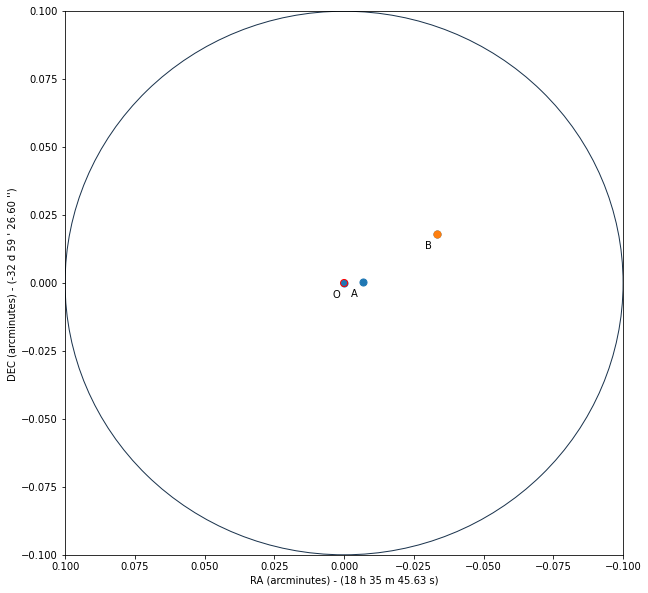

Position in degrees RA: 233.96292
Position in degrees DEC: -32.99042
Offset in arcmin of A from center: -0.00686 0.00055
Offset in arcmin of B from center: -0.03324 0.01800


In [4]:
RA_DEC=np.array([[18,35,45.4712],[-32,59,25.49]])
        
RA_center=[18,35,45.63]
DEC_center=[-32,59,26.6]



#RA_DEC = np.array([[[17,1,12.50942],[-30,6,30.173]],[[17,1,12.66788],[-30,6,49.001120]],[[17,1,12.8680361],[-30,6,59.42558]],[[17,1,13.5631],
#[-30,6,42.559]],[[17,1,13.2734],[-30,6,46.89]],[[17,1,12.8222],[-30,6,51.82]],[[17,1,14.25084031],[-30,6,21.4937304]],[[17,1,12.80],[-30,6,49.4]]])

RA_DEC = np.array([[[18,35,45.5973],[-32,59,26.567]],[[18,35,45.4715],[-32,59,25.52]],[[18,35,45.63],[-32,59,26.6]]])
GAL_RA_DEC = np.array([[18,35,45.63],[-32,59,26.6]])

RA_MINUTES_ALL = RA_minutes(RA_DEC[:,0,:])
DEC_ARCMINUTES_ALL = DEC_arcminutes(RA_DEC[:,1,:])
DEC_DEGREES_ALL = DEC_deg(RA_DEC[:,1,:])

#RA_ARCMINUTES_ALL = RA_minutes(RA_DEC[:,0,:])#*15#/(np.cos(math.radians(DEC_ARCMINUTES_ALL[-1])))
RA_HOUR_ALL = RA_hr(RA_DEC[:,0,:])
RA_DEGREES_ALL = RA_HOUR_ALL*15*np.cos(np.deg2rad(DEC_DEGREES_ALL[-1]))

RA_OFFSET_DEG=(RA_DEGREES_ALL-RA_DEGREES_ALL[-1])
DEC_OFFSET_DEG=(DEC_DEGREES_ALL-DEC_DEGREES_ALL[-1])

RA_OFFSET_ARCMINUTES=RA_OFFSET_DEG*60
DEC_OFFSET_ARCMINUTES=DEC_OFFSET_DEG*60
#for axis labels 
#s_xaxis=RA_ARCMINUTES_ALL[-1]*60
#s_yaxis=DEC_ARCMINUTES_ALL[-1]*60
#min_x, s = divmod(s_xaxis, 60)
#h, m = divmod(min_x, 60)

#arcmin_y, arcsec = divmod(s_yaxis, 60)
#deg, arcmin = divmod(arcmin_y, 60)

h,m,s = (RA_DEC[-1,-2,:])
deg, arcmin, arcsec = RA_DEC[-1,-1,:]
#SUBTRACTING A RA-DEC CENTRE OF CLUSTER SAY FROM ALL THE VALUES HERE:

#RA_ARCMINUTES_ALL=(RA_ARCMINUTES_ALL-(RA_ARCMINUTES_ALL[-1]))*np.cos(np.deg2rad(DEC_DEGREES_ALL))
#DEC_ARCMINUTES_ALL=DEC_ARCMINUTES_ALL-(DEC_ARCMINUTES_ALL[-1])

#print(len(RA_ARCMINUTES_ALL))
#print(len(DEC_ARCMINUTES_ALL))

fig= plt.figure(figsize=(10,10))
plt.scatter(RA_OFFSET_ARCMINUTES, DEC_OFFSET_ARCMINUTES, s=50)
plt.scatter(RA_OFFSET_ARCMINUTES[-2],DEC_OFFSET_ARCMINUTES[-2], s =50)
plt.scatter(RA_OFFSET_ARCMINUTES[-1],DEC_OFFSET_ARCMINUTES[-1], s = 50, facecolors = 'none', edgecolor='r')
variablelabel=['A','B','O']
for i, txt in enumerate(variablelabel):
    plt.annotate(txt, (RA_OFFSET_ARCMINUTES[i], DEC_OFFSET_ARCMINUTES[i]),xytext = (-12,-15), textcoords='offset points')
plt.xlabel("RA (arcminutes) - (%d h %d m %0.2f s)" %(h,m,s))
plt.ylabel("DEC (arcminutes) - (%d d %d ' %0.2f '') " %(deg,arcmin,arcsec))
plt.xticks()
#plt.grid()
#plt.savefig('M62_cluster_plot.png')
input_list = [{'x':DEC_OFFSET_ARCMINUTES[-1],'y':DEC_OFFSET_ARCMINUTES[-1],'radius':0.1, 'color':(0.1,0.2,0.3)}]    
output_list = []   
for point in input_list:
    output_list.append(plt.Circle((point['x'], point['y']), point['radius'], color=point['color'], fill=False))
fig = plt.subplot()

for circle in output_list:    
    fig.add_artist(circle)
plt.xlim(0.1,-0.1)
plt.ylim(-0.1,0.1)
plt.savefig('6652_cluster_plot_final.png',format='png')
plt.show()


print("Position in degrees RA: %0.5f"% RA_DEGREES_ALL[1])
print("Position in degrees DEC: %0.5f" %DEC_DEGREES_ALL[1])

print("Offset in arcmin of A from center: %0.5f %0.5f" %(RA_OFFSET_ARCMINUTES[0],DEC_OFFSET_ARCMINUTES[0]))
print("Offset in arcmin of B from center: %0.5f %0.5f" %(RA_OFFSET_ARCMINUTES[1],DEC_OFFSET_ARCMINUTES[1]))


In [6]:
DEC_DEGREES_ALL = DEC_deg(RA_DEC[:,1,:])
#print(DEC_DEGREES_ALL)
RA_hour_all= RA_hr(RA_DEC[:,0,:])
RA_deg_all=RA_hour_all*15
#print(RA_deg_all)

RA_deg_diff=(RA_deg_all-(RA_deg_all[-1]))*np.cos(np.deg2rad(DEC_DEGREES_ALL[-1]))
#print(RA_deg_diff)
RA_arcmin_diff=RA_deg_diff*60
print(RA_arcmin_diff)
DEC_deg_diff=(DEC_DEGREES_ALL-(DEC_DEGREES_ALL[-1]))
#print(DEC_deg_diff)
DEC_arcmin_diff=DEC_deg_diff*60
print(DEC_arcmin_diff)

inside negative dec deg loop
inside negative dec deg loop
inside negative dec deg loop
[-0.00685685 -0.03323582  0.        ]
[0.00055 0.018   0.     ]


In [9]:
# TOTAL OFFSET

dra=RA_arcmin_diff[1]
ddec=DEC_arcmin_diff[1]
dist_gc=10*1000
dtotal=np.sqrt(dra**2+ddec**2)  #offset from GC center in arcminutes

dtotal_deg=dtotal/60
print("distance in pc from GC center")
l=np.tan(np.deg2rad(dtotal_deg))*dist_gc
print(l) #in parsec
core_radii=0.1/60 #degrees
l_core=np.tan(np.deg2rad(core_radii))*dist_gc
l_distincoreradii=l/l_core
print("distance in core radii from GC center")
print(l_distincoreradii)

distance in pc from GC center
0.1099472555284712
distance in core radii from GC center
0.3779708225430606


Obs Period:  0.0018302930799292817
Obs Period der:  4.34223468948606e-20
PM:  8.895190019330672
2.3724258902043347e-17
1.3667946343067412e-15
distance in light sec:  1029000000000.0
pdot/p:  2.3724258902043347e-17
PM acceleration: lt-sec 1.9223032719684197e-18
PM acceleration: meter 5.765041688332889e-13
Total acceleration: (including pm and galactic contributions) -2.7924487822202e-18
Maximum los acceleration (using pdot/p -a_gal - a_pm):  2.6516707684263546e-17
al max (upper limit on cluster's acceleration) from pdot/p in lt-seconds:  2.6516707684263546e-17
al max (upper limit on cluster's acceleration) from pdot/p in m/s2:  7.949508974732856e-09
pbdot/pb(m/s2):  2.4969492418827967e-09
pbdot/pb lower limit with two sig error(m/s2):  -3.7897743506061385e-09
pbdot/pb upper limit with two sig error(m/s2):  8.780218022108005e-09
a_GC from pbdot/pb:  3.332376920011834e-09
a_GC 1 from pbdot/pb:  -2.952619266345238e-09
a_GC 2 from pbdot/pb:  9.617373106368906e-09
intrisic pdot/p values:  1.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in sqrt


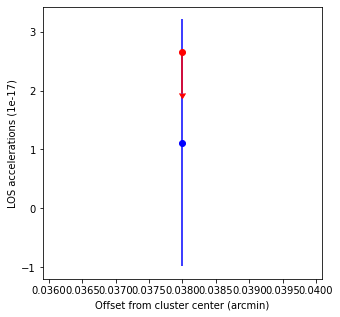

In [4]:
f=546.36058616286618417
f_er=0.00000000009838277
c=299792458
p=1./f
fdot=-1.2962e-14
pdot=-fdot/f**2
pmra=-7.7008
pmdec=-4.4522 #mas/yr
pm = np.sqrt(pmra**2+pmdec**2)
print('Obs Period: ',p)
print('Obs Period der: ',pdot)
print('PM: ',pm)
print(pdot/p)
a=-2792.4487822202e-21
#a=-1282.1517208102e-21   
#a=3720.8474998548e-21
#a=6871.3573255158e-21
#a=-699.4997760105998e-21
mu_rad_s=pm*1e-3*2*3.14/(3600*365*24*3600*360) #rad/s
d=10*1e3*1.029*1e8 #lt-s
d_m=10*3.086e+16
print(mu_rad_s)
print("distance in light sec: ",d)
print("pdot/p: ",pdot/p)
print("PM acceleration: lt-sec", mu_rad_s**2*d)
print("PM acceleration: meter",mu_rad_s**2*d_m)
print("Total acceleration: (including pm and galactic contributions)", a)
al_max=(pdot/p)-a
print("Maximum los acceleration (using pdot/p -a_gal - a_pm): ", al_max)
#pbdot contribution (error bars)


print("al max (upper limit on cluster's acceleration) from pdot/p in lt-seconds: ",al_max)
print("al max (upper limit on cluster's acceleration) from pdot/p in m/s2: ",al_max*c)



pbdot=0.861409061*1e-12
#pbdot=-1.0270991251e-12
sig=1.084863996*1e-12
pbdot_l=pbdot-(2*sig)
pbdot_h=pbdot+(2*sig)
pb=1.19786323*24*60*60 #seconds
print("pbdot/pb(m/s2): ",pbdot*3e8/pb)
print("pbdot/pb lower limit with two sig error(m/s2): ",pbdot_l*c/pb)
print("pbdot/pb upper limit with two sig error(m/s2): ",pbdot_h*c/pb)

#-----------updated till this point----------------

agc_pb=(pbdot/pb)-a
agc_pb_1=(pbdot_l/pb)-a
agc_pb_2=(pbdot_h/pb)-a

print("a_GC from pbdot/pb: ",agc_pb*c)
print("a_GC 1 from pbdot/pb: ",agc_pb_1*c)
print("a_GC 2 from pbdot/pb: ",agc_pb_2*c)
plt.figure(figsize=(5,5))
plt.errorbar(0.038,agc_pb*1e17,yerr=(agc_pb-agc_pb_1)*1e17,color='blue',fmt='o')
#plt.scatter(10,agc_pb_1*1e17,color='blue')
#plt.scatter(10,agc_pb_2*1e17,color='blue')
#plt.ylim(al_max*1e17*0.1,al_max*1e17*10)
plt.errorbar(0.038,al_max*1e17,yerr=0.7,color='red',uplims=True,fmt='o')
plt.ylabel('LOS accelerations (1e-17)')
plt.xlabel('Offset from cluster center (arcmin)')
pidot_p=(pdot/p)-(pbdot/pb)
pidot_p_1=(pdot/p)-(pbdot_l/pb)
pidot_p_2=(pdot/p)-(pbdot_h/pb)
print("intrisic pdot/p values: ", pidot_p)
print("intrisic pdot/p values: ", pidot_p_1)
print("intrisic pdot/p values: ", pidot_p_2)
print("intrinsic pdot lower limit is: ",pidot_p_2*p)
print("intrinsic pdot upper limit is: ",pidot_p_1*p)
print("intrinsic pdot value is: ",pidot_p*p)
pidot=pidot_p*p
pidot_l=pidot_p_2*p
pidot_h=pidot_p_1*p
sig=pidot_h-pidot
print("1 sigma uncertainty in pidot: ", 1*sig)

#Characteristic age and surface mag field


print("1 sigma Lower limit of intrinsic pdot:",pidot-1*(sig))
print("1 sigma Upper limit of intrinsic pdot:",pidot+1*(sig))

print("1 sigma lower limit is going negative, so only upper limit is useful!")

tc_l=15.8*p*((pidot+(1*sig))/1e-15)**(-1)
tc_h=15.8*p*((pidot-(1*sig))/1e-15)**(-1)
print("1 sigma lower limit on characteristic age (Myr) is: ", tc_l)


Bs_h = 3.2*1e19*np.sqrt(p*(pidot+(1*sig)))/(10**(8))
Bs_l = 3.2*1e19*np.sqrt(p*(pidot-(1*sig)))/(10**(8))
print("1 sigma upper limit on Magnetic field is(10*8 G): ",Bs_h)


Results of accel.bin(to calculate galactic acceleration)

distance:  10.00000 

Inputs:
  spin period:     0.00183 sec
  proper motion:  11.88680 mas/yr  1.82615e-15 rad/sec
  Galactic PA of proper motion:   4.63367 (rad)
  galactic lat:  -11.37618 deg     -1.98552e-01 rad
  galactic long:   1.53394 deg     2.67724e-02 rad
Assumptions:
  gal ctr dist     8.27500 kpc     8.51722e+11 lt-sec
  rot velocity   240.50000 km/s    8.02222e-04 lt-sec/sec

 The pulsar's distance from the Galactic centre is   2.49605 kpc
 
  Intermediate calculations:
  distance:      ( 10.00000   1.50000/ -1.50000) kpc 
  z-height       ( -1.97250   0.29587/ -0.29587) kpc
Results (p-dot/p bias, for nominal acceleration):
  disk acceleration           -53.6681386811 x 10^-21
  rotation acceleration     -4660.9125059955 x 10^-21
  proper motion accel        3432.4289238663 x 10^-21
  total acceleration    (    -1282.1517208102      2400.0599425612/    -3669.8973927657) x 10^-21


In [141]:
k_masyr2rads=1e-3*2*np.pi/(3600*365*24*3600*360) #rad/s
pmra=-4.1672
pmdec=-11.1324  #mas/yr
pm = np.sqrt(pmra**2+pmdec**2)
print(pm)
mu_masyr2rads=k_masyr2rads*pm
#k_rads2ms=(10*1e3*3.0856775814914e16)
#mu_ms=k_rads2ms*np.tan(mu_masyr2rads)
print(mu_masyr2rads)
d_m=10*3.086e+16
a_pm=(mu_masyr2rads**2)*d_m
print(a_pm)
print("pm acceleration/c in m/s2", a_pm/3e8)
print("pdot/p: ",pdot/p)

11.886794588954587
1.827397463617449e-15
1.0305331278249509e-12
pm acceleration/c in m/s2 3.43511042608317e-21
pdot/p:  2.3717988880184894e-17


In [153]:
#NEW SET OF CALCULATION:

f=546.3605861631967855
f_er=0.0000000001943911
p=1./f
fdot=-1.295857430719e-14
pdot=-fdot/f**2
pmra=-4.1672
pmdec=-11.1324  #mas/yr
pm = np.sqrt(pmra**2+pmdec**2) #mas/yr
d_m=10*(10**3)*3.086e16
d_lt_s=d_m/3e8
pm_rad_s=pm*(10**-3)*2*np.pi/(3600*360*365*24*3600)  #rad/s
a_pm_rads_lt_s = (pm_rad_s**2)*d_lt_s
a_pm_rads_m_s = (pm_rad_s**2)*d_m

print(a_pm_rads_lt_s)
print(a_pm_rads_m_s)
print(a_pm_rads_lt_s*3e8)

3.435110426083169e-18
1.0305331278249508e-09
1.0305331278249508e-09


In [164]:
#Characteristic age

pdot_l=pidot_p_2*p

tc_l=15.8*p*(pdot_l/1e-15)**(-1)

Bs_l = (pdot_l/10**(-15))**(1./2)*(p)**(1./2)
print(pdot_l)
print(tc_l)
print(Bs_l)

2.0878892927937806e-20
1385.0653271069496
0.00019548527628076204


In [192]:
pdot_h=(99+89)*10**(-21)
pdot_l=(99-89)*10**(-21)
p=7.588479807367e-3
tc_l=15.8*p*(pdot_h/1e-15)**(-1)
Bs_h = (pdot_h/10**(-15))**(1./2)*(p)**(1./2)
Bs=3.2*np.sqrt(p*pdot_h)
print("Tc in Myr: ",p/(2*pdot_l))
print("Mag field in 10**(19) Gauss",Bs)
print(Bs_h)

Tc in Myr:  3.7942399036835e+17
Mag field in 10**(19) Gauss 1.2086659690236323e-10
0.0011944179351403746


In [3]:
#PULSAR A:

f=257.1445442587271941
f_er=0.0000000001192955
p=1./f
fdot=1.676341571102e-14
pdot=-fdot/f**2
#pmra=-4.1672
#pmdec=-11.1324  #mas/yr
#pm = np.sqrt(pmra**2+pmdec**2)
print('Obs Period: ',p)
print('Obs Period der: ',pdot)
#print('PM: ',pm)
print(pdot/p)
a=-1282.1517208102e-21   
#mu_rad_s=pm*1e-3*2*3.14/(3600*365*24*3600*360) #rad/s
d=10*1e3*1.029*1e8 #lt-s
d_m=10*3.086e+16
#print(mu_rad_s)
print("distance in light sec: ",d)
print("pdot/p: ",pdot/p)
#print("PM acceleration: lt-sec", mu_rad_s**2*d)
#print("PM acceleration: meter",mu_rad_s**2*d_m)
#print("Total acceleration: (including pm and galactic contributions)", a)
al_max=(pdot/p)-a
print("Maximum los acceleration: ", al_max)
#pbdot contribution (error bars)
print("pdot/p",pdot/p)
pbdot=-1.0270991251e-12
sig=2.301187794*1e-12
pbdot_l=pbdot-(2*sig)
pbdot_h=pbdot+(2*sig)
pb=1.19786322*24*60*60 #seconds
print("al max (upper limit on cluster's acceleration) from pdot/p in lt-seconds: ",al_max)
print("al max (upper limit on cluster's acceleration) from pdot/p in m/s2: ",al_max*3e8)
print("pbdot/pb: ",pbdot/pb)
print("pbdot/pb lower limit: ",pbdot_l/pb)
print("pbdot/pb upper limit: ",pbdot_h/pb)

agc_pb=(pbdot/pb)-a
agc_pb_1=(pbdot_l/pb)-a
agc_pb_2=(pbdot_h/pb)-a

print("a_GC from pbdot/pb: ",agc_pb)
print("a_GC 1 from pbdot/pb: ",agc_pb_1)
print("a_GC 2 from pbdot/pb: ",agc_pb_2)
plt.figure(figsize=(5,5))
plt.errorbar(0.038,agc_pb*1e17,yerr=(agc_pb-agc_pb_1)*1e17,color='blue',fmt='o')
#plt.scatter(10,agc_pb_1*1e17,color='blue')
#plt.scatter(10,agc_pb_2*1e17,color='blue')
#plt.ylim(al_max*1e17*0.1,al_max*1e17*10)
plt.errorbar(0.038,al_max*1e17,yerr=0.7,color='red',uplims=True,fmt='o')
plt.ylabel('LOS accelerations (1e-17)')
plt.xlabel('Offset from cluster center (arcmin)')
pidot_p=(pdot/p)-(pbdot/pb)
pidot_p_1=(pdot/p)-(pbdot_l/pb)
pidot_p_2=(pdot/p)-(pbdot_h/pb)
print("intrisic pdot/p values: ", pidot_p)
print("intrisic pdot/p values: ", pidot_p_1)
print("intrisic pdot/p values: ", pidot_p_2)
print("intrinsic pdot lower limit is: ",pidot_p_2*p)
print("intrinsic pdot upper limit is: ",pidot_p_1*p)
print("intrinsic pdot value is: ",pidot_p*p)
pidot=pidot_p*p
pidot_l=pidot_p_2*p
pidot_h=pidot_p_1*p
sig=pidot_h-pidot
print("2 sigma uncertainty in pidot: ", 2*sig)

#Characteristic age and surface mag field


print("2 sigma Lower limit of intrinsic pdot:",pidot-(sig))
print("2 sigma Upper limit of intrinsic pdot:",pidot+(sig))

print("2 sigma lower limit is going negative, so only upper limit is useful!")

tc_l=15.8*p*((pidot+(1*sig))/1e-15)**(-1)
tc_h=15.8*p*((pidot-(1*sig))/1e-15)**(-1)
print("2 sigma lower limit on characteristic age (Myr) is: ", tc_l)
print("1 sigma upper limit on characteristic age (Myr) is: ", tc_h)

Bs_h = 3.2*1e19*np.sqrt(p*(pidot+(1*sig)))/(10**(8))
Bs_l = 3.2*1e19*np.sqrt(p*(pidot-(1*sig)))/(10**(8))
print("2 sigma upper limit on Magnetic field is(10*8 G): ",Bs_h)
print("1 sigma lower limit on Magnetic field is(10*8 G): ",Bs_l)

Obs Period:  0.0038888633740323314
Obs Period der:  -2.535174664902552e-19
-6.519063338226381e-17
distance in light sec:  1029000000000.0
pdot/p:  -6.519063338226381e-17
Maximum los acceleration:  -6.390848166145362e-17
pdot/p -6.519063338226381e-17
al max (upper limit on cluster's acceleration) from pdot/p in lt-seconds:  -6.390848166145362e-17
al max (upper limit on cluster's acceleration) from pdot/p in m/s2:  -1.9172544498436084e-08
pbdot/pb:  -9.924105821801654e-18
pbdot/pb lower limit:  -5.43934868686813e-17
pbdot/pb upper limit:  3.454527522507799e-17
a_GC from pbdot/pb:  -8.641954100991454e-18
a_GC 1 from pbdot/pb:  -5.31113351478711e-17
a_GC 2 from pbdot/pb:  3.5827426945888196e-17


NameError: name 'plt' is not defined